<a href="https://colab.research.google.com/github/YashNigam65/gitfolder/blob/master/notebook/Other/pima_indians_classification_dt_frameworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is example of DecisionTreeClassifier, It is a supervised machine learning algorithm that makes decisions by asking yes/no questions step by step — like a flowchart. This is a non-parametric supervised learning method used for classification and regression.

Each:

Internal node = a question

Branch = answer (Yes/No or True/False)

Leaf node = final decision or class

**Super Simple Real-Life Example**

Goal: Predict whether a person will play cricket today.

We have two features:

Weather (Sunny / Rainy)

Temperature (Hot / Cool)

Training data (very small for understanding):

Weather	Temperature	Will Play Cricket?


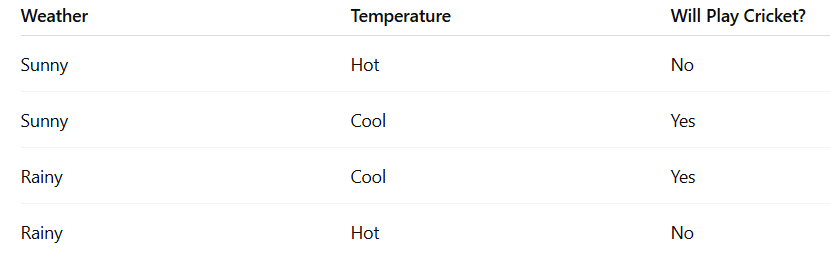

How the Decision Tree Works
1️⃣ Splitting (Choosing best question)

The tree checks:
Which feature (Weather or Temperature) best separates Yes/No classes?

Suppose Weather gives the best separation (using Gini/Information Gain).

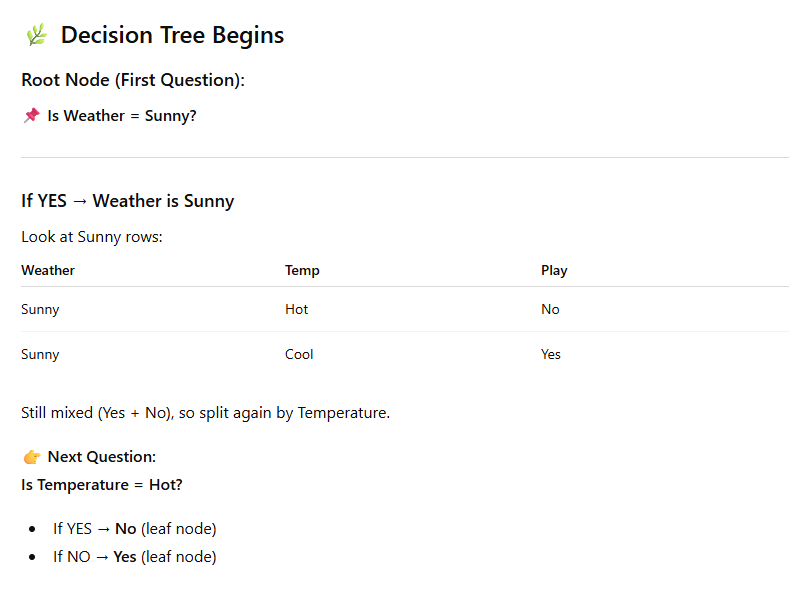

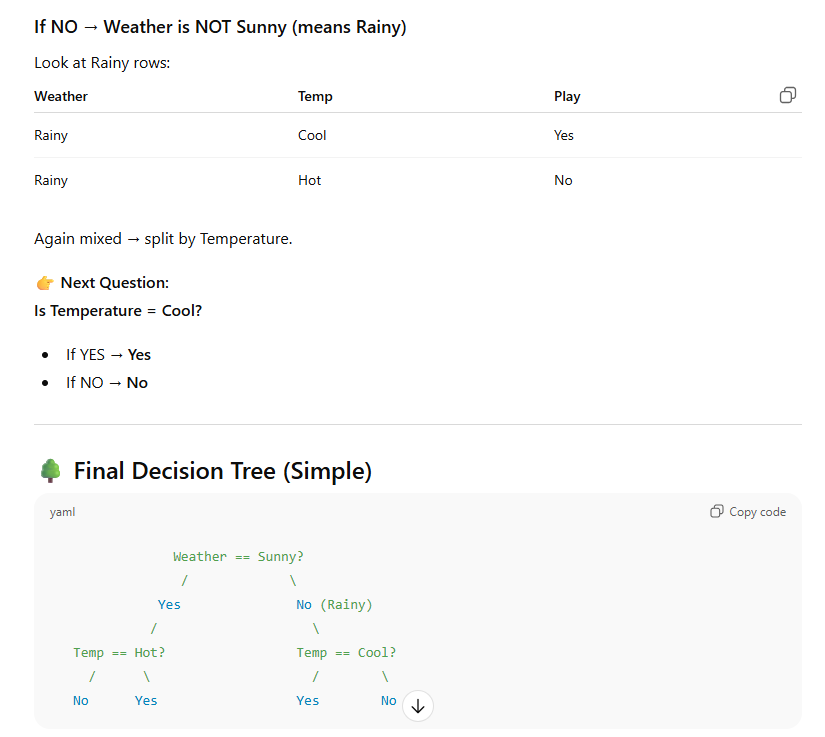

A DecisionTreeClassifier is a powerful and interpretable machine learning algorithm, while K-Nearest Neighbors (KNN) is a simpler, instance-based learning algorithm. Here's how they work and how they differ:

**from sklearn.model_selection import KFold**: Imports KFold from sklearn.model_selection. This is a cross-validation iterator that divides the dataset into k folds (subsets) to evaluate the model's performance more robustly.

**from sklearn.model_selection import cross_val_score**: Imports cross_val_score from sklearn.model_selection. This function performs cross-validation and returns a score for each fold, useful for estimating model performance.

**from sklearn import tree**: Imports the tree module from sklearn. This module contains implementations of decision tree algorithms, specifically DecisionTreeClassifier which is used.

In [1]:
# KNN Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

**Data Loading, Preprocessing, and Model Training (Decision Tree)**: This cell handles loading the training dataset, preparing it for a machine learning model, training a Decision Tree classifier, and evaluating its performance using cross-validation.

In [4]:
filename = 'https://raw.githubusercontent.com/YashNigam65/gitfolder/refs/heads/master/dataset/pima-indians_classification_train.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
# array = dataframe.values: Converts the DataFrame into a NumPy array.
# Many scikit-learn models expect NumPy arrays as input.
array = dataframe.values
# inputx = array[:,0:8]: Extracts the input features (independent variables) from the array.
# It selects all rows (:) and columns from index 0 up to (but not including) 8. These are the 'preg' through 'age' columns.
inputx = array[:,0:8]
outputy = array[:,8]
kfold = KFold(n_splits=10, random_state=None)
model = tree.DecisionTreeClassifier()
#results = cross_val_score(model, inputx, outputy, cv=kfold): Performs 10-fold cross-validation.
#It trains and evaluates the model on different splits of inputx and outputy as defined by kfold.
# It returns an array of scores (accuracy in this case), one for each fold.
results = cross_val_score(model, inputx, outputy, cv=kfold)
print(results.mean())
model.fit(inputx,outputy)

0.6925495557074505


DecisionTreeClassifier()

**Test Data Loading, Prediction, and Interpretation**: This cell loads a separate test dataset, uses the previously trained model to make predictions on it, and then interprets these predictions.



In [6]:
filename = 'https://raw.githubusercontent.com/YashNigam65/gitfolder/refs/heads/master/dataset/pima-indians_classification_test.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
newdataframe = read_csv(filename, names=names)
array = newdataframe.values
inputx = array[:,0:8]
#print(inputx)
results = model.predict(inputx)
print(model.predict(inputx))
for val in results:
    if val == 0:
        print("diabetes not probable",end="   ")
    else:
        print("probability of getting diabetes",end="   ")
print()

[1. 0. 1. 0. 1. 0. 1.]
probability of getting diabetes   diabetes not probable   probability of getting diabetes   diabetes not probable   probability of getting diabetes   diabetes not probable   probability of getting diabetes   


K-Nearest Neighbors (KNN) is a non-parametric, lazy learning algorithm used for both classification and regression. Training Phase: The 'training' phase of KNN is minimal. It simply stores the entire training dataset.
Prediction Phase: When a new, unseen data point needs to be classified:
It calculates the distance (e.g., Euclidean distance) between the new data point and all training data points.
It identifies the K closest data points (neighbors) to the new data point.
It assigns the new data point to the class that is most frequent among its K nearest neighbors (a majority vote).

### Simple Example: K-Nearest Neighbors (KNN) Classifier

This demonstrates training a KNN model and predicting for the same new data point. Note that for KNN, 'training' simply means storing the data.

In [8]:
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Load the dataset (same as above)
filename = 'https://raw.githubusercontent.com/YashNigam65/gitfolder/refs/heads/master/dataset/pima-indians_classification_train.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values

# Separate features (X) and target (y)
X = array[:,0:8]  # Features
y = array[:,8]    # Target variable (class)

# 1. Initialize the KNN model (n_neighbors is a key parameter)
knn_simple_model = KNeighborsClassifier(n_neighbors=5) # We'll use 5 neighbors

# 2. Train the model (KNN essentially just 'learns' by storing the data)
knn_simple_model.fit(X, y)

# 3. Use the same new data point to predict
# preg=2, plas=100, pres=70, skin=30, test=150, mass=30, pedi=0.5, age=40
new_patient_data = np.array([[2, 100, 70, 30, 150, 30, 0.5, 40]])

# 4. Make a prediction for the new data point
prediction_knn = knn_simple_model.predict(new_patient_data)

print(f"KNN Prediction for new patient: {prediction_knn[0]}")
if prediction_knn[0] == 0:
    print("   -> Diabetes not probable")
else:
    print("   -> Probability of getting diabetes")

KNN Prediction for new patient: 0.0
   -> Diabetes not probable


*n_neighbors=5*: This is a key parameter for the KNN algorithm. It specifies the number of neighbors (K) that the model should consider when making a prediction for a new data point. In this case, when a new patient's data is given, the model will look at the 5 closest data points (patients) from the training data. The class (diabetes or no diabetes) that is most common among these 5 neighbors will be assigned to the new patient.

Note: If we put less value of n then it will be overfitted and with large value it will be uder fitted so we need balance value. The optimal value for n_neighbors is usually found through a process called hyperparameter tuning, where you experiment with different K values (often using techniques like cross-validation) and select the one that gives the best performance on validation data. There's a trade-off between bias and variance, and the best K often lies somewhere in the middle, balancing these factors for the specific dataset.